In [109]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data.csv')

In [110]:
df = df.drop(columns=['id'])

In [111]:
from sklearn.preprocessing import LabelEncoder

# Buat objek label encoder
le = LabelEncoder()

# Daftar kolom kategorikal yang akan dienkode
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Terapkan label encoder ke setiap kolom
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [112]:
# Inisialisasi KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Terapkan imputer ke dataframe
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Tampilkan dataframe yang sudah diimputasi
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


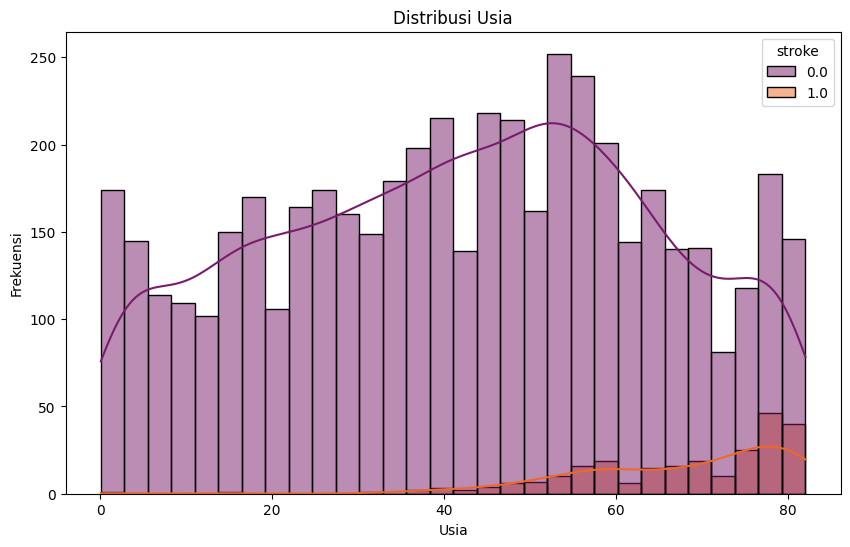

In [113]:
# Visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', bins=30, kde=True, hue='stroke', palette='inferno')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

In [114]:
# Filter data pasien dengan umur < 18 dan terkena stroke
under_18_stroke = df[(df['age'] < 18) & (df['stroke'] == 1)]

# Hitung jumlah pasien
num_under_18_stroke = len(under_18_stroke)

# Dapatkan umur pasien
ages_under_18_stroke = under_18_stroke['age'].tolist()

print(f"Jumlah pasien dengan umur < 18 yang terkena stroke: {num_under_18_stroke}")
print(f"Umur pasien yang terkena stroke: {ages_under_18_stroke}")

Jumlah pasien dengan umur < 18 yang terkena stroke: 2
Umur pasien yang terkena stroke: [1.32, 14.0]


In [115]:
# Hapus data pasien dengan umur < 18 tahun
df = df[df['age'] >= 18]

# Tampilkan jumlah data setelah penghapusan
print(f"Jumlah data setelah penghapusan pasien < 18 tahun: {len(df)}")

Jumlah data setelah penghapusan pasien < 18 tahun: 4254


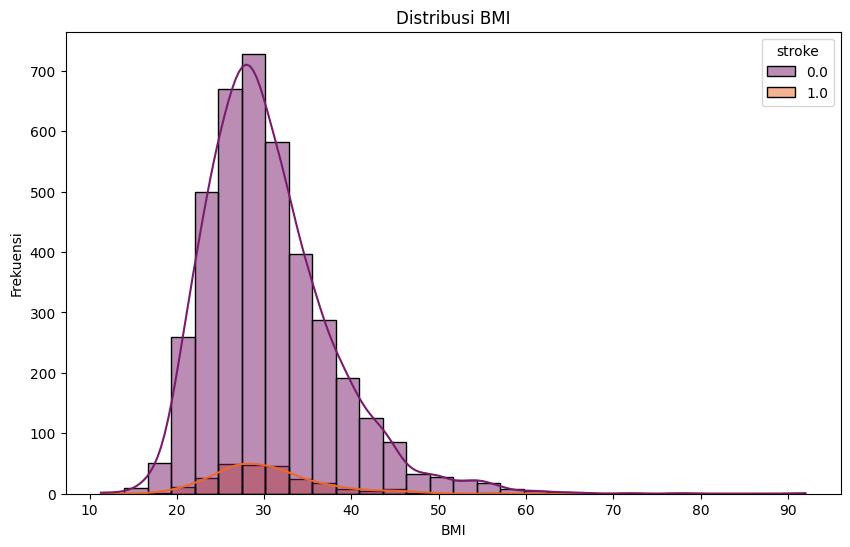

In [116]:
# Visualisasi distribusi BMI
plt.figure(figsize=(10, 6))
sns.histplot(df, x='bmi', bins=30, kde=True, hue='stroke', palette='inferno')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

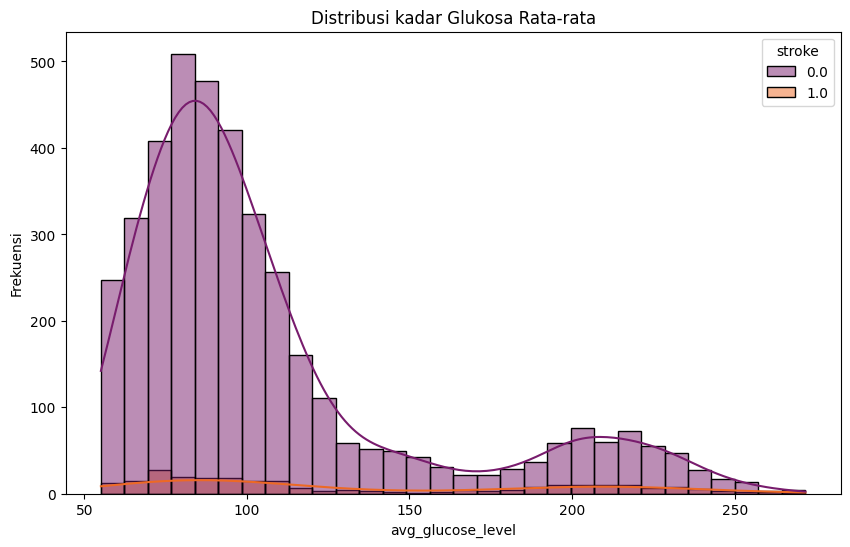

In [117]:
# Visualisasi distribusi AVG Glucose Level
plt.figure(figsize=(10, 6))
sns.histplot(df, x='avg_glucose_level', bins=30, kde=True, hue='stroke', palette='inferno')
plt.title('Distribusi kadar Glukosa Rata-rata')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frekuensi')
plt.show()

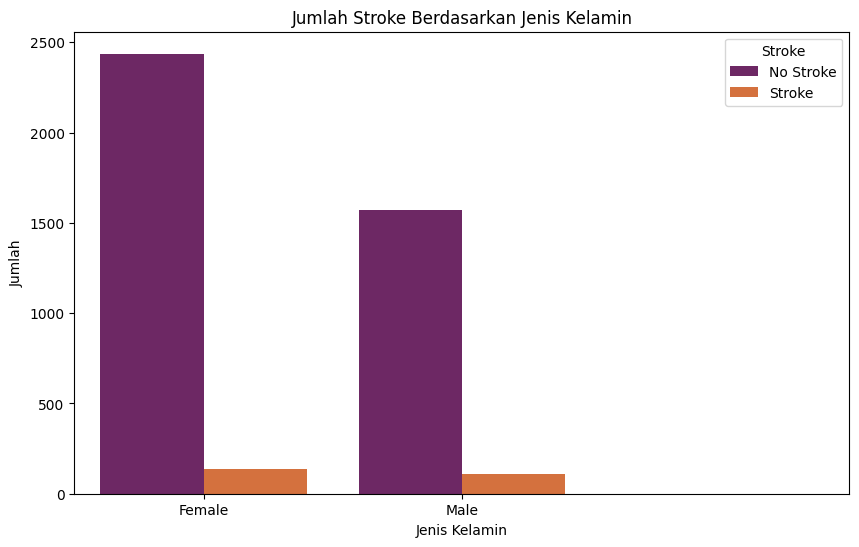

In [118]:
gender_mapping = {0: 'Female', 1: 'Male'}

# Visualisasi jumlah stroke berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='stroke', data=df, palette='inferno')
plt.title('Jumlah Stroke Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.xticks(ticks=[0, 1], labels=[gender_mapping[0], gender_mapping[1]])
plt.show()


In [119]:
# Hapus baris yang memiliki nilai selain 'Male' dan 'Female' pada kolom 'gender'
df = df[df['gender'].isin([0, 1])]

# Tampilkan jumlah data setelah penghapusan
print(f"Jumlah data setelah penghapusan: {len(df)}")

Jumlah data setelah penghapusan: 4253


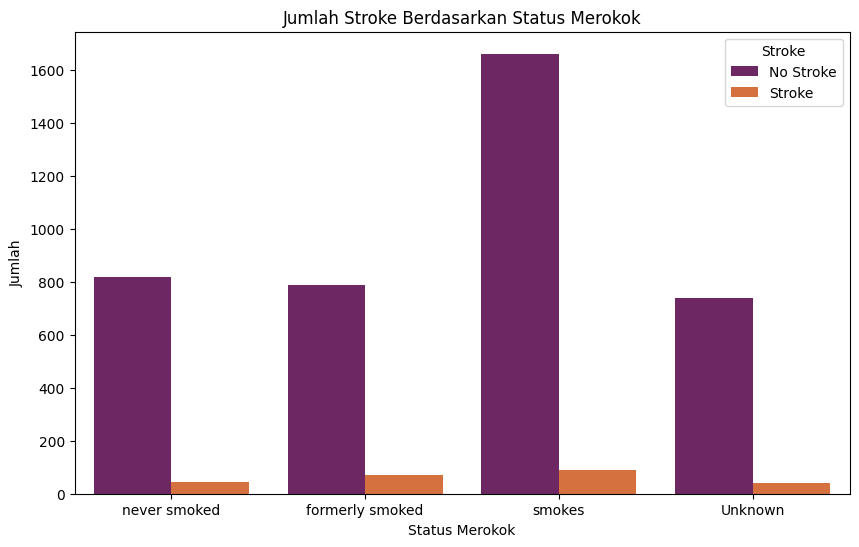

In [120]:
smoking_status_mapping = {0: 'never smoked', 1: 'formerly smoked', 2: 'smokes', 3: 'Unknown'}


# Visualisasi jumlah stroke berdasarkan status merokok
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df, palette='inferno')
plt.title('Jumlah Stroke Berdasarkan Status Merokok')
plt.xlabel('Status Merokok')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.xticks(ticks=[0, 1, 2, 3], labels=[smoking_status_mapping[0], smoking_status_mapping[1], smoking_status_mapping[2], smoking_status_mapping[3]])
plt.show()

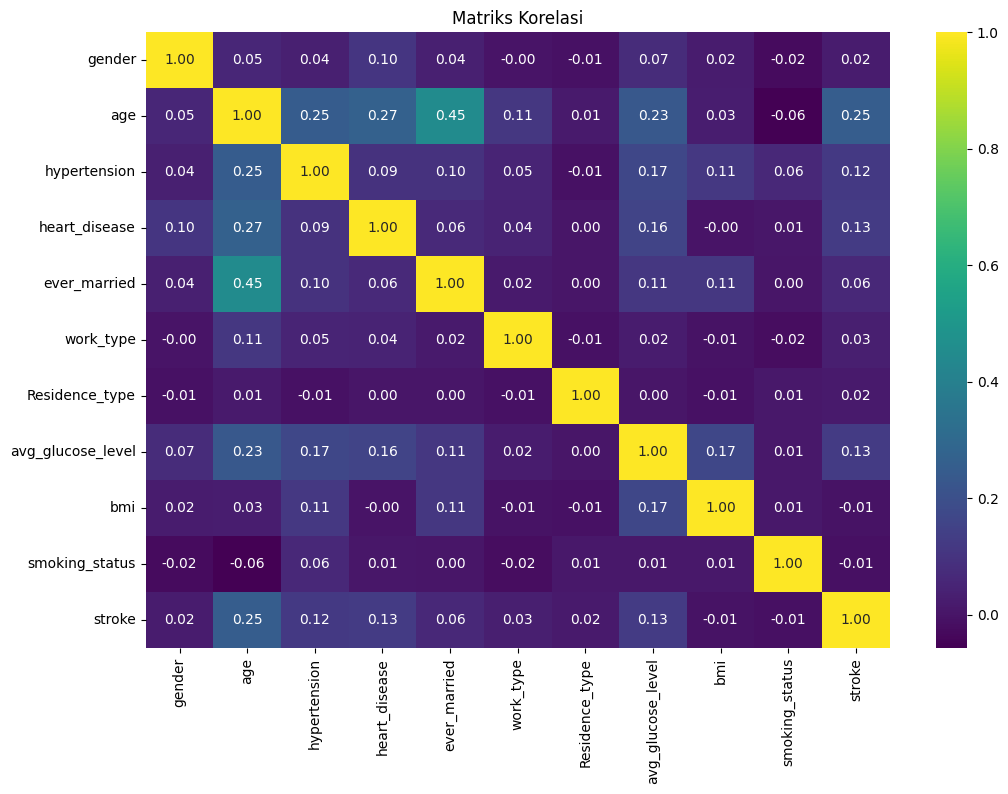

In [121]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

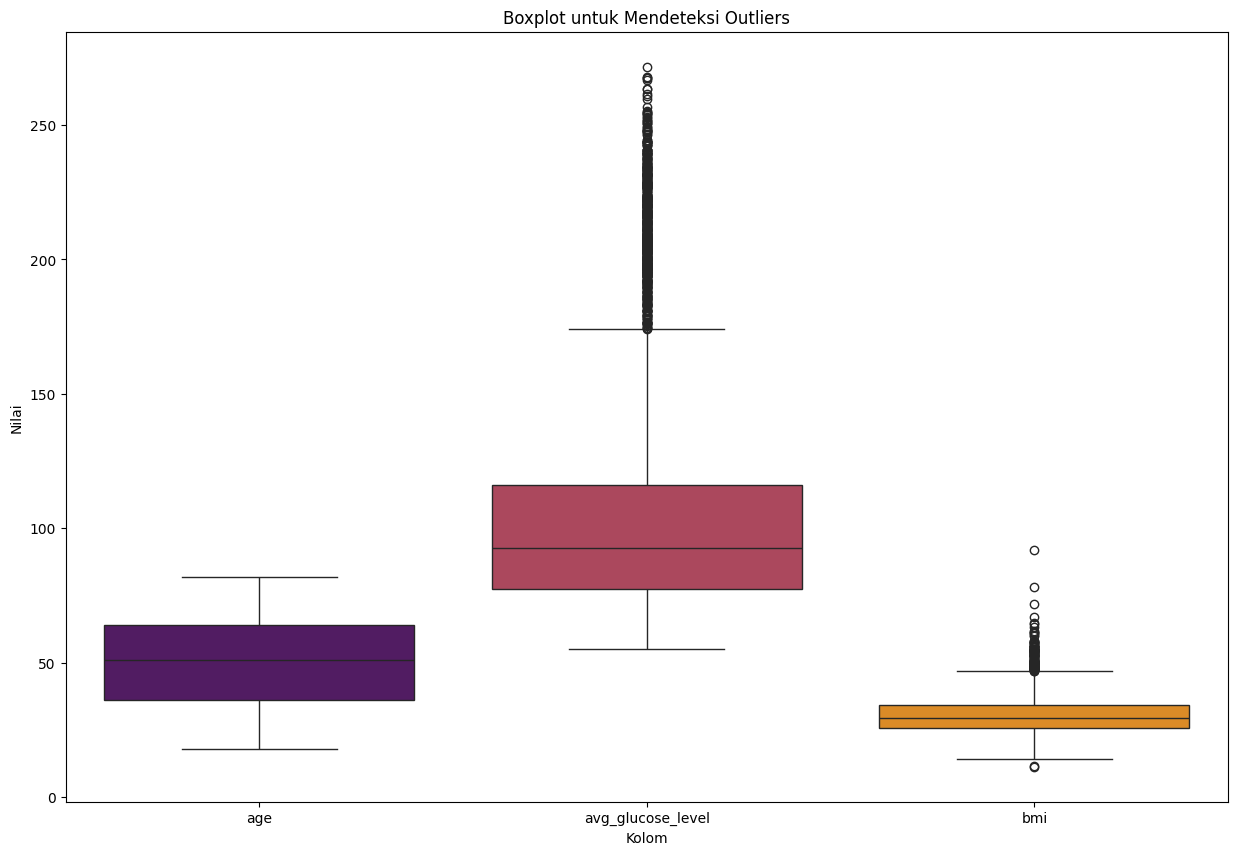

In [122]:
# Visualisasi outliers menggunakan boxplot dengan seaborn
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']], palette='inferno')
plt.title('Boxplot untuk Mendeteksi Outliers')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.show()

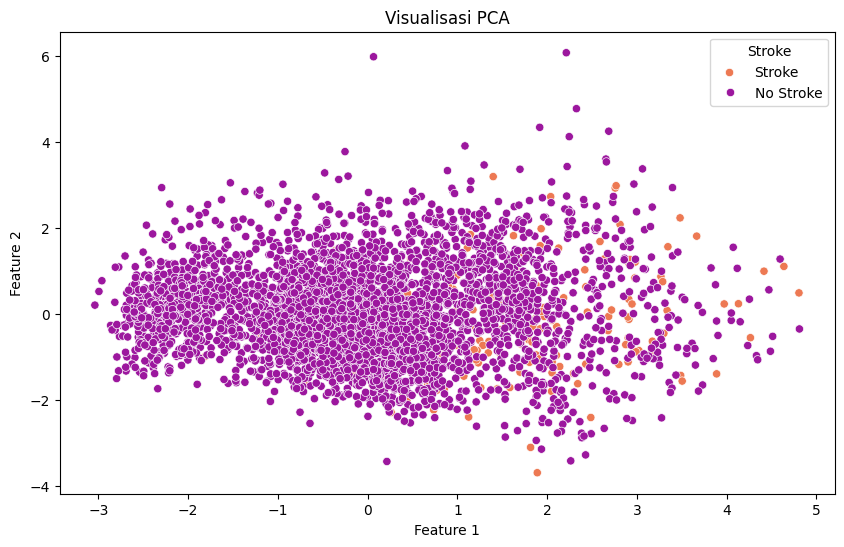

In [123]:
from sklearn.decomposition import PCA

# Pisahkan fitur dan target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat DataFrame hasil PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['stroke'] = y.values

# Visualisasikan hasil PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='stroke', data=df_pca, palette='plasma')
plt.title('Visualisasi PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Stroke', loc='upper right', labels=['Stroke', 'No Stroke'])
plt.show()

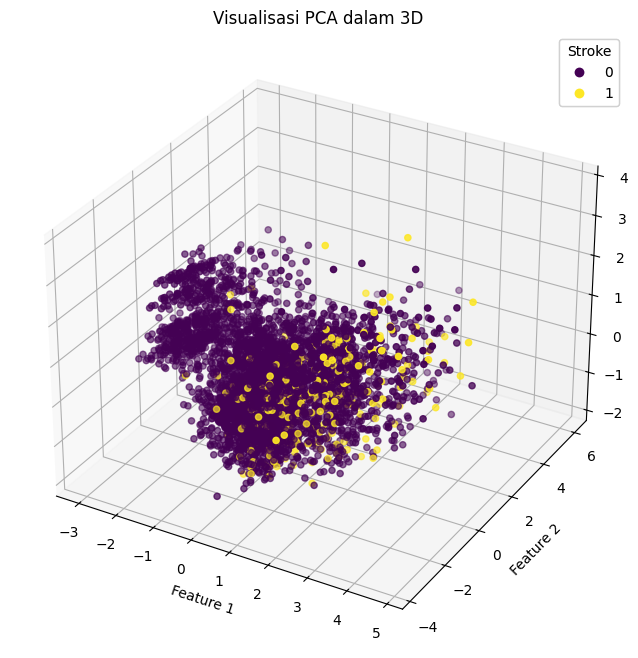

In [124]:
from mpl_toolkits.mplot3d import Axes3D

# Terapkan PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Buat DataFrame hasil PCA
df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['stroke'] = y.values

# Visualisasikan hasil PCA dalam 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['stroke'], cmap='viridis')

# Tambahkan legenda
legend1 = ax.legend(*scatter.legend_elements(), title="Stroke")
ax.add_artist(legend1)

# Tambahkan label dan judul
ax.set_title('Visualisasi PCA dalam 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

In [125]:
# Split data menjadi berdasarkan target
stroke_data = df[df['stroke'] == 1]
no_stroke_data = df[df['stroke'] == 0]

# Tampilkan jumlah data stroke dan no stroke
print(f"Number of stroke samples: {len(stroke_data)}")
print(f"Number of no stroke samples: {len(no_stroke_data)}")

# Simpan data train dan test ke dalam file CSV
stroke_data.to_csv('Stroke.csv', index=False)
no_stroke_data.to_csv('NonStroke.csv', index=False)

Number of stroke samples: 247
Number of no stroke samples: 4006


In [126]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Bagi data stroke menjadi 5 fold
# stroke_folds = np.array_split(stroke_data, 5)

# # Simpan masing-masing fold menjadi file
# for i, fold in enumerate(stroke_folds):
#     fold.to_csv(f'stroke_fold_{i+1}.csv', index=False)


In [127]:
# # Bagi data non-stroke menjadi 5 fold
# no_stroke_folds = np.array_split(no_stroke_data, 5)

# # Simpan masing-masing fold menjadi file
# for i, fold in enumerate(no_stroke_folds):
#     fold.to_csv(f'no_stroke_fold_{i+1}.csv', index=False)

In [138]:
from imblearn.over_sampling import SMOTE

def load_fold_data(sf, nfs):
    """
    Memuat data lipatan (fold) yang ditentukan untuk prediksi stroke.
    Args:
        SF (int): Indeks lipatan yang akan dimuat dari data stroke.
        NFS (int): Indeks lipatan yang akan dimuat dari data non-stroke.
    Returns:
        tuple: Mengembalikan dua elemen:
            - training_data: Data training yang akan digunakan untuk melatih model.
            - testing_data: Data testing yang akan digunakan untuk menguji model.
    """
    # Load fold dari stroke data
    stroke_fold = pd.read_csv(f'StrokeFold/stroke_fold_{sf}.csv')

    # Load fold dari no stroke data
    no_stroke_fold = pd.read_csv(f'NonStrokeFold/no_stroke_fold_{nfs}.csv')

    # Concat semua fold kecuali fold yang ditentukan sebagai training_stroke
    training_stroke = pd.concat([fold for i, fold in enumerate(stroke_folds) if i != sf])

    # Ambil 100 data di no_stroke_fold sebagai testing
    testing_no_stroke = no_stroke_fold.sample(n=100, random_state=42)

    # Sisanya sebagai training
    training_no_stroke = no_stroke_fold.drop(testing_no_stroke.index)

    # Gabungkan data training stroke dan non-stroke
    training_data = pd.concat([training_stroke, training_no_stroke])

    # Gabungkan data testing stroke dan non-stroke
    testing_data = pd.concat([stroke_fold, testing_no_stroke])
    
    # Inisialisasi SMOTE
    smote = SMOTE(sampling_strategy=0.7, random_state=42)
    
    # Terapkan SMOTE pada data training
    X_train_smote, y_train_smote = smote.fit_resample(training_data.drop(columns=['stroke']), training_data['stroke'])

    # Gabungkan kembali data yang telah di-resample
    training_data = pd.concat([X_train_smote, y_train_smote], axis=1)

    return training_data, testing_data


## Random Forest Pure

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

results = []

# Loop through all combinations of folds
for sf in range(1, 6):
    for nfs in range(1, 6):
        test_data, train_data = load_fold_data(sf, nfs)
        
        # Pisahkan fitur dan target untuk data train dan test
        X_train = train_data.drop(columns=['stroke'])
        y_train = train_data['stroke']
        X_test = test_data.drop(columns=['stroke'])
        y_test = test_data['stroke']
        
        # Inisialisasi model Random Forest
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        
        # Latih model
        rf_model.fit(X_train, y_train)
        
        # Prediksi pada data test
        y_pred = rf_model.predict(X_test)
        
        # Evaluasi model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Simpan hasil
        results.append({
            'Stroke Fold': sf,
            'Non-Stroke Fold': nfs,
            'Accuracy': accuracy,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score']
        })

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)

# Tampilkan hasil
print(results_df)

    Stroke Fold  Non-Stroke Fold  Accuracy  Precision    Recall  F1-Score
0             1                1  0.761945   0.760139  0.761945  0.759540
1             1                2  0.782536   0.781171  0.782536  0.781157
2             1                3  0.742233   0.739947  0.742233  0.738788
3             1                4  0.764064   0.762333  0.764064  0.762265
4             1                5  0.772460   0.772986  0.772460  0.772696
5             2                1  0.756915   0.754992  0.756915  0.754687
6             2                2  0.738875   0.736455  0.738875  0.735913
7             2                3  0.708648   0.705587  0.708648  0.701509
8             2                4  0.734677   0.732126  0.734677  0.731469
9             2                5  0.759866   0.764208  0.759866  0.761092
10            3                1  0.764459   0.762800  0.764459  0.761681
11            3                2  0.752309   0.750959  0.752309  0.747771
12            3                3  0.71

In [158]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Definisikan ruang pencarian untuk hyperparameter
param_space = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Real(0.1, 1.0, prior='uniform')
}

# Inisialisasi model RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Inisialisasi BayesSearchCV
opt = BayesSearchCV(
    rf_model,
    param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Latih model dengan optimasi Bayesian
opt.fit(X_train, y_train)

# Tampilkan hasil terbaik
print(f"Best parameters: {opt.best_params_}")
print(f"Best score: {opt.best_score_}")

# Prediksi pada data test
y_pred_opt = opt.predict(X_test)

# Evaluasi model
accuracy_opt = accuracy_score(y_test, y_pred_opt)
report_opt = classification_report(y_test, y_pred_opt)

print(f"Optimized Model Accuracy: {accuracy_opt}")
print(f"Optimized Model Classification Report:\n{report_opt}")

Best parameters: OrderedDict({'max_depth': 50, 'max_features': 0.5397139324208629, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 187})
Best score: 0.7923809523809524
Optimized Model Accuracy: 0.7691015952980689
Optimized Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       701
         1.0       0.72      0.72      0.72       490

    accuracy                           0.77      1191
   macro avg       0.76      0.76      0.76      1191
weighted avg       0.77      0.77      0.77      1191



In [154]:
# Inisialisasi model RandomForestClassifier dengan parameter terbaik
best_params = opt.best_params_
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

best_results = []

# Loop through all combinations of folds
for sf in range(1, 6):
    for nfs in range(1, 6):
        train_data, test_data = load_fold_data(sf, nfs)
        
        # Pisahkan fitur dan target untuk data train dan test
        X_train = train_data.drop(columns=['stroke'])
        y_train = train_data['stroke']
        X_test = test_data.drop(columns=['stroke'])
        y_test = test_data['stroke']
        
        # Latih model dengan parameter terbaik
        best_rf_model.fit(X_train, y_train)
        
        # Prediksi pada data test
        y_pred_best = best_rf_model.predict(X_test)
        
        # Evaluasi model
        accuracy_best = accuracy_score(y_test, y_pred_best)
        report_best = classification_report(y_test, y_pred_best, output_dict=True)
        
        # Simpan hasil
        best_results.append({
            'Stroke Fold': sf,
            'Non-Stroke Fold': nfs,
            'Accuracy': accuracy_best,
            'Precision': report_best['weighted avg']['precision'],
            'Recall': report_best['weighted avg']['recall'],
            'F1-Score': report_best['weighted avg']['f1-score']
        })

# Buat DataFrame dari hasil terbaik
best_results_df = pd.DataFrame(best_results)

# Tampilkan hasil terbaik
print(best_results_df)

    Stroke Fold  Non-Stroke Fold  Accuracy  Precision    Recall  F1-Score
0             1                1  0.786667   0.782018  0.786667  0.782965
1             1                2  0.820000   0.816562  0.820000  0.816269
2             1                3  0.740000   0.741335  0.740000  0.740634
3             1                4  0.800000   0.796053  0.800000  0.792024
4             1                5  0.833333   0.830544  0.833333  0.829879
5             2                1  0.760000   0.752273  0.760000  0.752381
6             2                2  0.793333   0.788404  0.793333  0.785949
7             2                3  0.733333   0.726558  0.733333  0.728706
8             2                4  0.786667   0.781061  0.786667  0.779894
9             2                5  0.793333   0.788404  0.793333  0.785949
10            3                1  0.818792   0.815516  0.818792  0.816131
11            3                2  0.838926   0.836404  0.838926  0.834865
12            3                3  0.77

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
results = []

for i in range(1, 6):
    for j in range(1, 6):
        # Definisikan ruang pencarian untuk hyperparameter
        param_space = {
            'n_estimators': Integer(10, 200),
            'max_depth': Integer(1, 50),
            'min_samples_split': Integer(2, 20),
            'min_samples_leaf': Integer(1, 20),
            'max_features': Real(0.1, 1.0, prior='uniform')
        }

        # Inisialisasi model RandomForestClassifier
        rf_model = RandomForestClassifier(random_state=42)

        # Inisialisasi BayesSearchCV
        opt = BayesSearchCV(
            rf_model,
            param_space,
            n_iter=32,
            cv=3,
            n_jobs=-1,
            random_state=42
        )

        # Latih model dengan optimasi Bayesian
        train_data, test_data = load_fold_data(i, j)
        X_train = train_data.drop(columns=['stroke'])
        y_train = train_data['stroke']
        X_test = test_data.drop(columns=['stroke'])
        y_test = test_data['stroke']
        opt.fit(X_train, y_train)

        # Simpan hasil terbaik
        best_params = opt.best_params_
        best_score = opt.best_score_

        # Prediksi pada data test
        y_pred_opt = opt.predict(X_test)

        # Evaluasi model
        accuracy_opt = accuracy_score(y_test, y_pred_opt)
        report_opt = classification_report(y_test, y_pred_opt, target_names=['No Stroke', 'Stroke'], output_dict=True)

        # Simpan hasil dalam dataframe
        results.append({
            'Stroke Fold': i,
            'Non-Stroke Fold': j,
            'Best Parameters': best_params,
            'Best Score': best_score,
            'Accuracy': accuracy_opt,
            'Precision': report_opt['weighted avg']['precision'],
            'Recall': report_opt['weighted avg']['recall'],
            'F1-Score': report_opt['weighted avg']['f1-score']
        })

# Buat DataFrame dari hasil
result_best_parameters = pd.DataFrame(results)

In [180]:
# Tampilkan hasil terbaik dengan format tabel yang lebih teratur
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(result_best_parameters.to_string(index=False)) 

 Stroke Fold  Non-Stroke Fold                                                                                                             Best Parameters  Best Score  Accuracy  Precision   Recall  F1-Score
           1                1                  {'max_depth': 17, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 19}    0.820669  0.840000   0.837479 0.840000  0.837224
           1                2                   {'max_depth': 30, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 83}    0.848027  0.946667   0.954023 0.946667  0.947531
           1                3                 {'max_depth': 41, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 200}    0.823678  0.793333   0.789418 0.793333  0.790415
           1                4                   {'max_depth': 36, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}    0.830395  0.920000 

In [ ]:
# Inisialisasi model RandomForestClassifier dengan parameter yang ditentukan

rf_model_custom = RandomForestClassifier(
    max_depth=30,
    max_features=0.1,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=83,
    random_state=42
)

custom_results = []

# Loop through all combinations of folds
for sf in range(1, 6):
    for nfs in range(1, 6):
        train_data, test_data = load_fold_data(sf, nfs)
        
        # Pisahkan fitur dan target untuk data train dan test
        X_train = train_data.drop(columns=['stroke'])
        y_train = train_data['stroke']
        X_test = test_data.drop(columns=['stroke'])
        y_test = test_data['stroke']
        
        # Latih model dengan parameter yang ditentukan
        rf_model_custom.fit(X_train, y_train)
        
        # Prediksi pada data test
        y_pred_custom = rf_model_custom.predict(X_test)
        
        # Evaluasi model
        accuracy_custom = accuracy_score(y_test, y_pred_custom)
        report_custom = classification_report(y_test, y_pred_custom, output_dict=True)
        
        # Simpan hasil
        custom_results.append({
            'Stroke Fold': sf,
            'Non-Stroke Fold': nfs,
            'Accuracy': accuracy_custom,
            'Precision': report_custom['weighted avg']['precision'],
            'Recall': report_custom['weighted avg']['recall'],
            'F1-Score': report_custom['weighted avg']['f1-score']
        })

# Buat DataFrame dari hasil
custom_results_df = pd.DataFrame(custom_results)

# Tampilkan hasil
print(custom_results_df)
print(custom_results_df.mean())

    Stroke Fold  Non-Stroke Fold  Accuracy  Precision    Recall  F1-Score
0             1                1  0.920000   0.935484  0.920000  0.921733
1             1                2  0.946667   0.954023  0.946667  0.947531
2             1                3  0.906667   0.927083  0.906667  0.908885
3             1                4  0.926667   0.939891  0.926667  0.928166
4             1                5  0.926667   0.939891  0.926667  0.928166
5             2                1  0.933333   0.944444  0.933333  0.934609
6             2                2  0.960000   0.964286  0.960000  0.960514
7             2                3  0.940000   0.949153  0.940000  0.941063
8             2                4  0.940000   0.949153  0.940000  0.941063
9             2                5  0.933333   0.944444  0.933333  0.934609
10            3                1  0.932886   0.944261  0.932886  0.934227
11            3                2  0.953020   0.958893  0.953020  0.953734
12            3                3  0.91

# SVM

In [181]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model SVM
svm_model = SVC(random_state=42)

svm_results = []

# Loop through all combinations of folds
for sf in range(1, 6):
    for nfs in range(1, 6):
        train_data, test_data = load_fold_data(sf, nfs)
        
        # Pisahkan fitur dan target untuk data train dan test
        X_train = train_data.drop(columns=['stroke'])
        y_train = train_data['stroke']
        X_test = test_data.drop(columns=['stroke'])
        y_test = test_data['stroke']
        
        # Latih model
        svm_model.fit(X_train, y_train)
        
        # Prediksi pada data test
        y_pred_svm = svm_model.predict(X_test)

        # Evaluasi model
        accuracy_svm = accuracy_score(y_test, y_pred_svm)
        report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

        # Simpan hasil dalam dataframe
        svm_results.append({
            'Stroke Fold': sf,
            'Non-Stroke Fold': nfs,
            'Accuracy': accuracy_svm,
            'Precision': report_svm['weighted avg']['precision'],
            'Recall': report_svm['weighted avg']['recall'],
            'F1-Score': report_svm['weighted avg']['f1-score']
        })

# Buat DataFrame dari hasil
svm_results_df = pd.DataFrame(svm_results)

# Tampilkan hasil
print(svm_results_df)


    Stroke Fold  Non-Stroke Fold  Accuracy  Precision    Recall  F1-Score
0             1                1  0.740000   0.754517  0.740000  0.744608
1             1                2  0.760000   0.768617  0.760000  0.763081
2             1                3  0.693333   0.724387  0.693333  0.701149
3             1                4  0.766667   0.773525  0.766667  0.769231
4             1                5  0.786667   0.791667  0.786667  0.788592
5             2                1  0.733333   0.758600  0.733333  0.739672
6             2                2  0.740000   0.758519  0.740000  0.745317
7             2                3  0.706667   0.742348  0.706667  0.714534
8             2                4  0.766667   0.780468  0.766667  0.770802
9             2                5  0.786667   0.791667  0.786667  0.788592
10            3                1  0.744966   0.766076  0.744966  0.750738
11            3                2  0.765101   0.775646  0.765101  0.768671
12            3                3  0.69

In [ ]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import accuracy_score, classification_report

# Definisikan ruang pencarian untuk hyperparameter
param_space_svm = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'degree': Integer(1, 8),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Inisialisasi model SVM
svm_model = SVC(random_state=42)

# Inisialisasi BayesSearchCV
opt_svm = BayesSearchCV(
    svm_model,
    param_space_svm,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)

svm_results = []

# Loop through all combinations of folds
for sf in range(1, 6):
    for nfs in range(1, 6):
        train_data, test_data = load_fold_data(sf, nfs)
        
        # Pisahkan fitur dan target untuk data train dan test
        X_train = train_data.drop(columns=['stroke'])
        y_train = train_data['stroke']
        X_test = test_data.drop(columns=['stroke'])
        y_test = test_data['stroke']
        
        # Latih model dengan optimasi Bayesian
        opt_svm.fit(X_train, y_train)
        
        # Simpan hasil terbaik
        best_params_svm = opt_svm.best_params_
        best_score_svm = opt_svm.best_score_

        # Prediksi pada data test
        y_pred_svm = opt_svm.predict(X_test)

        # Evaluasi model
        accuracy_svm = accuracy_score(y_test, y_pred_svm)
        report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

        # Simpan hasil dalam dataframe
        svm_results.append({
            'Stroke Fold': sf,
            'Non-Stroke Fold': nfs,
            'Best Parameters': best_params_svm,
            'Best Score': best_score_svm,
            'Accuracy': accuracy_svm,
            'Precision': report_svm['weighted avg']['precision'],
            'Recall': report_svm['weighted avg']['recall'],
            'F1-Score': report_svm['weighted avg']['f1-score']
        })

# Buat DataFrame dari hasil
svm_results_df = pd.DataFrame(svm_results)

# Tampilkan hasil
print(svm_results_df)